In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/ferideaxu/Downloads/DataSets/Boston House Price linear_regression/BostonHousing.csv')

In [6]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
df.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [8]:
df.shape

(489, 4)

What do I know about the data set?

Features:

RM : Average Number of Rooms
LSTAT : Average Low Wage 
PTRatio : Pupil-Teacher Ratio

What is the response:

MEDV : Median Value of a House

What else:

o There are 489 data points(observations)(represented by the rows) and each observation belongs to a specific town in Boston.
o Since the target feature is continuous, I am supposed to apply the regression method to this problem.

In [9]:
import seaborn as sns

%matplotlib inline

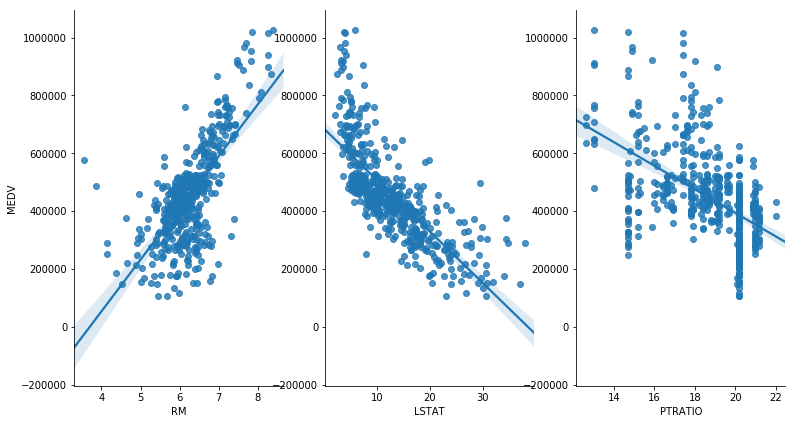

In [16]:
sns.pairplot(df, x_vars=['RM', 'LSTAT','PTRATIO'], y_vars='MEDV', size=6, aspect=0.6, kind='reg')

We should apply linear regression method to columns, our target variable is MEDV. We may select one column instead of 3 columns.

In [17]:
X= df[['RM','LSTAT','PTRATIO']]
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [19]:
print(type(X)); X.shape

<class 'pandas.core.frame.DataFrame'>


(489, 3)

In [20]:
y= df.MEDV
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [21]:
print(type(y)); y.shape

<class 'pandas.core.series.Series'>


(489,)

Split X and y into training and testing Sets

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Linear Regression in scikit-Learn

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Interpret model coefficients

In [30]:
print(reg.intercept_)
print(list(zip(['RM','LTSTAT','PTRATIO'],reg.coef_)))

374190.790882
[('RM', 91586.440659011394), ('LTSTAT', -10200.4183480192), ('PTRATIO', -19182.770593406734)]


How do we interpret RM coefficient (91586.44)?

o For a given LSTAT and PTRATIO region, one 'ROOM' increase in RM is going to impact $374,190.79 increase in MEDV of homes.

o Since LSTAT and PTRATIO coefficients are negative, we can interpret that one unit increase in those features will result in the decrease of that amount in MEDV of homes.

In [33]:
y_pred= reg.predict(X_test)

In [49]:
y_test

451    401100.0
84     501900.0
434    319200.0
472    147000.0
428    247800.0
312    388500.0
30     266700.0
220    980700.0
482    367500.0
231    489300.0
9      396900.0
124    394800.0
422    268800.0
204    405300.0
360    279300.0
70     508200.0
430    264600.0
431    296100.0
364    228900.0
211    451500.0
78     445200.0
181    621600.0
424    359100.0
55     743400.0
76     420000.0
77     436800.0
154    357000.0
265    672000.0
271    743400.0
381    105000.0
         ...   
440    283500.0
22     319200.0
321    407400.0
46     420000.0
31     304500.0
113    392700.0
370    155400.0
299    338100.0
192    726600.0
132    483000.0
57     663600.0
182    672000.0
24     327600.0
17     367500.0
180    554400.0
66     407400.0
261    529200.0
176    835800.0
94     432600.0
318    474600.0
384    151200.0
23     304500.0
210    602700.0
346    455700.0
307    485100.0
5      602700.0
116    445200.0
45     405300.0
16     485100.0
452    422100.0
Name: MEDV, Length: 147,

In [52]:
pd.Series(y_pred)

0      344506.487591
1      506327.279766
2      415353.170170
3      239962.063880
4      333649.613126
5      401230.979127
6      264056.489240
7      704358.325537
8      361900.166463
9      585599.742800
10     458070.513828
11     366913.202624
12     268670.154680
13     267718.351180
14     392280.217020
15     525044.973898
16     391510.787813
17     368227.375721
18     371107.260232
19     421832.764715
20     460366.516557
21     462133.342418
22     374289.397603
23     645665.293343
24     468445.234057
25     473055.429997
26     499307.032536
27     633910.246038
28     679721.907335
29     174088.888543
           ...      
117    357560.849831
118    342924.695473
119    522490.515803
120    416402.423288
121    394452.020844
122    416356.921246
123    118319.645237
124    347753.893441
125    731160.881295
126    437676.202151
127    668492.481978
128    635613.123847
129    347643.863811
130    370315.250802
131    403386.039267
132    490906.632538
133    521669

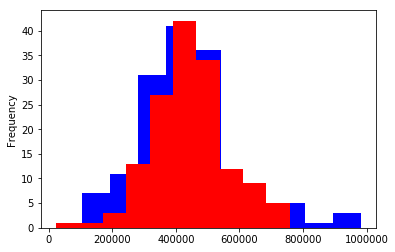

In [61]:
import matplotlib.pyplot as plt
y_test.plot(kind='hist', color='blue')
pd.Series(y_pred).plot(kind='hist',color='red')
plt.show()

In [62]:
import numpy as np
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

83953.6734171


In [74]:
X= df['RM'].values.reshape(-1,1)

In [72]:
y=df.MEDV.values.reshape(-1,1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

119536.767643


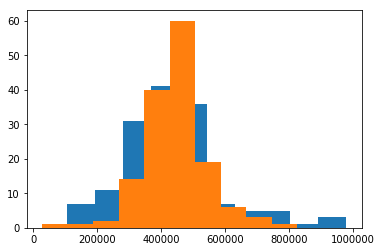

In [89]:
plt.hist(y_test)
plt.hist(y_pred)
plt.show()